In [ ]:
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf

In [2]:
from matplotlib import pyplot
from sklearn import metrics
from IPython.display import Audio
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [4]:
Data="C:\\Users\\DELL\\data\\TESS\\"

In [5]:
type(Data)

str

In [6]:
paths = []
labels = []
for dirname, _, filenames in os.walk(Data):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]


['C:\\Users\\DELL\\data\\TESS\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\DELL\\data\\TESS\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\DELL\\data\\TESS\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\DELL\\data\\TESS\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\DELL\\data\\TESS\\OAF_angry\\OAF_bean_angry.wav']

In [9]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\DELL\data\TESS\OAF_angry\OAF_back_ang...,angry
1,C:\Users\DELL\data\TESS\OAF_angry\OAF_bar_angr...,angry
2,C:\Users\DELL\data\TESS\OAF_angry\OAF_base_ang...,angry
3,C:\Users\DELL\data\TESS\OAF_angry\OAF_bath_ang...,angry
4,C:\Users\DELL\data\TESS\OAF_angry\OAF_bean_ang...,angry


In [11]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

# Data Visualization


<Axes: xlabel='label', ylabel='count'>

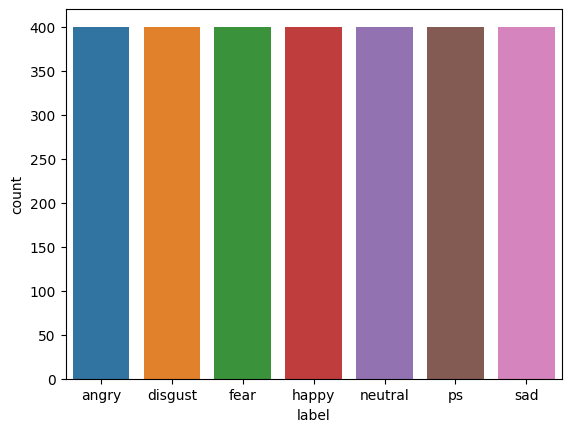

In [12]:
sns.countplot(data=df,x='label')

In [13]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.plot(data,color='blue')
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

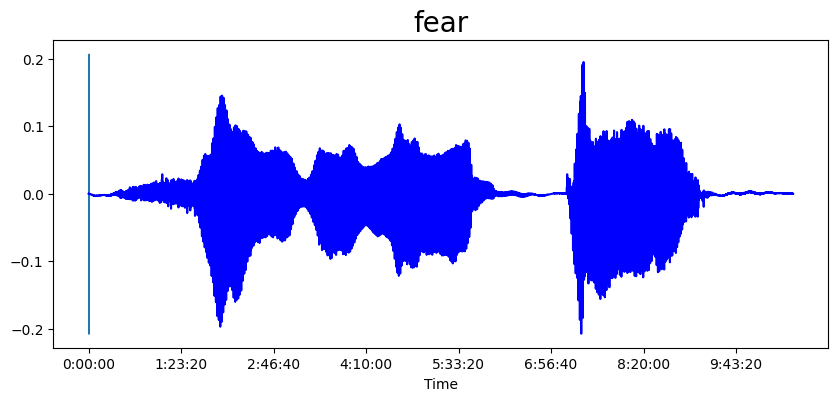

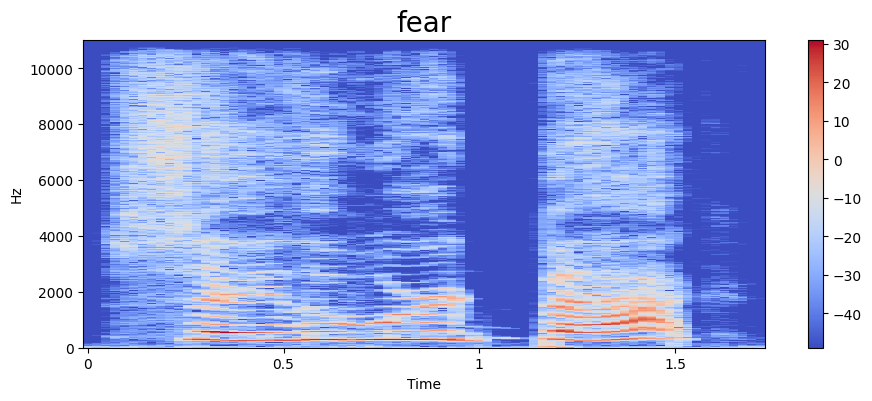

In [14]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

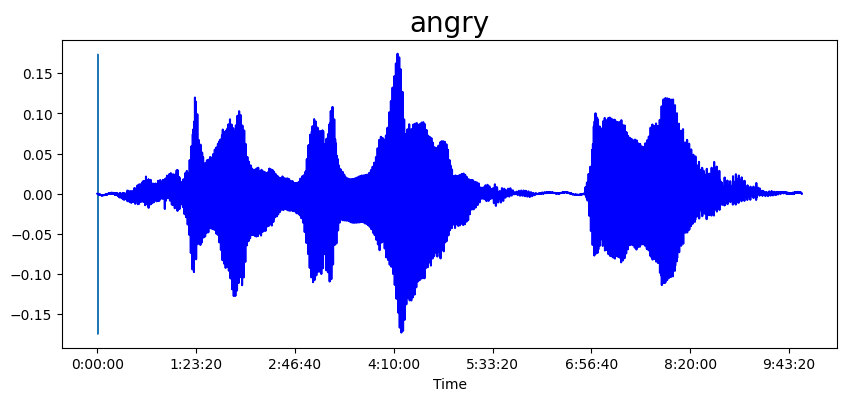

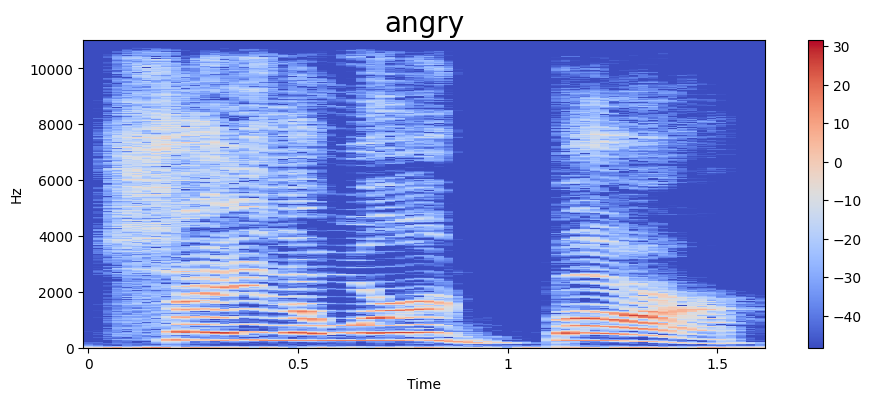

In [15]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

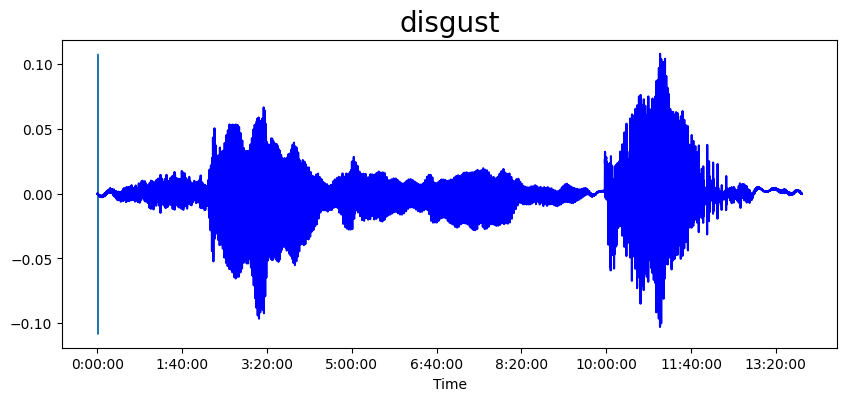

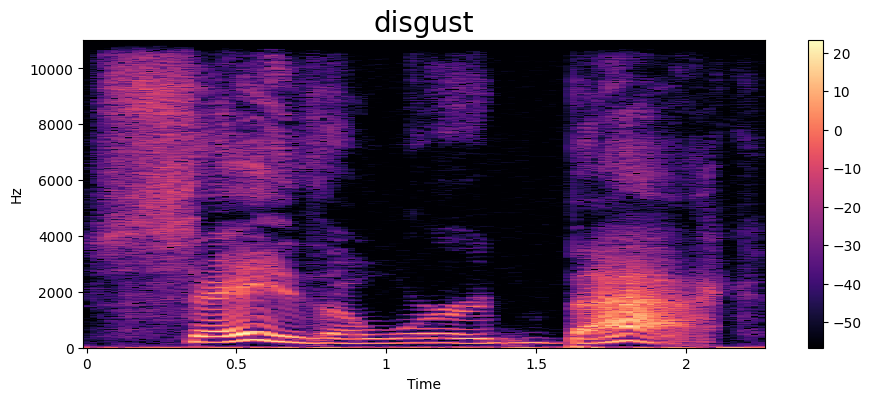

In [16]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

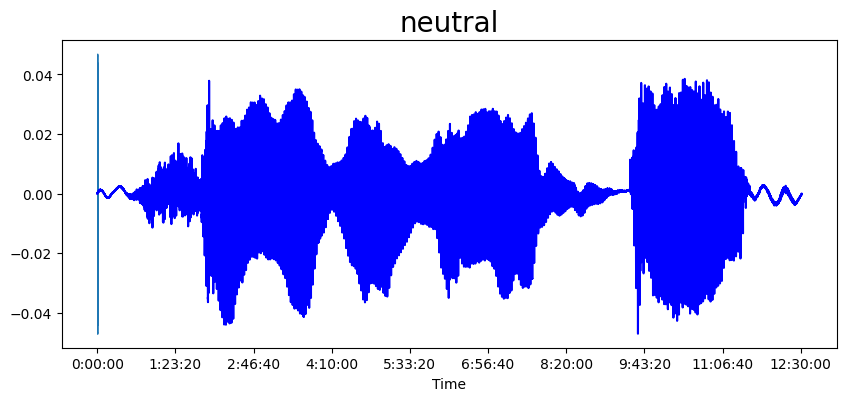

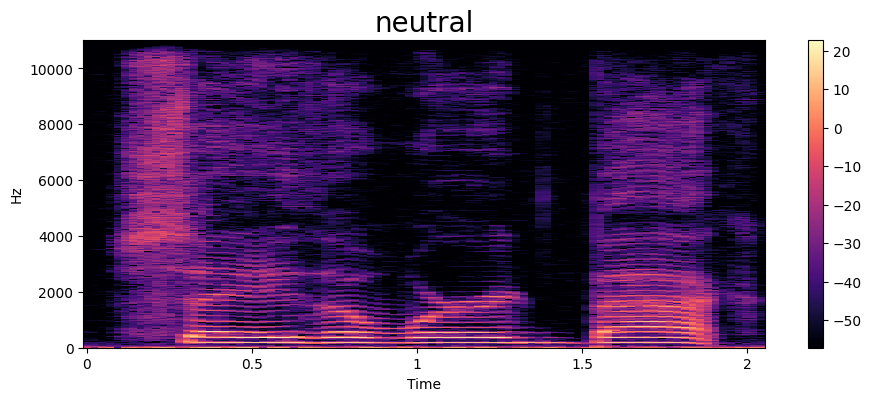

In [17]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

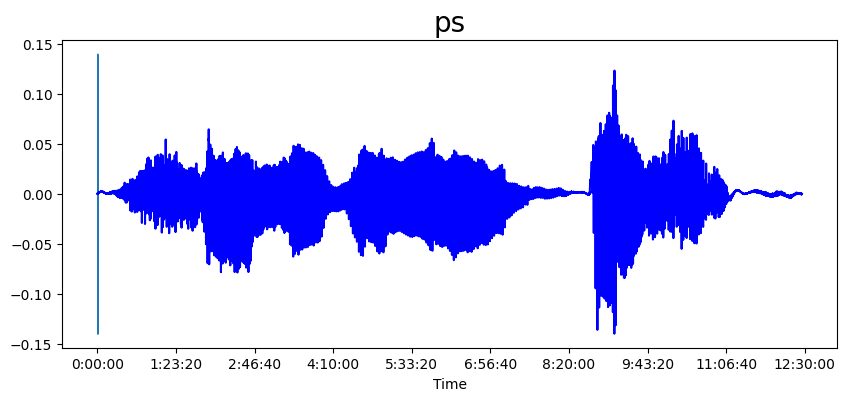

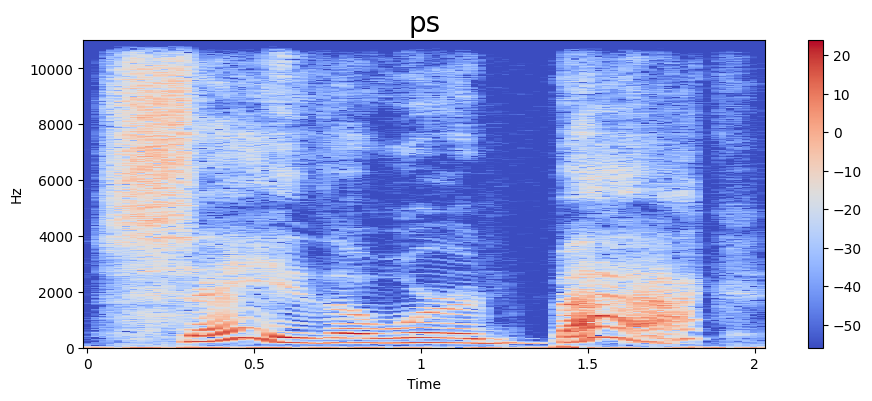

In [18]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

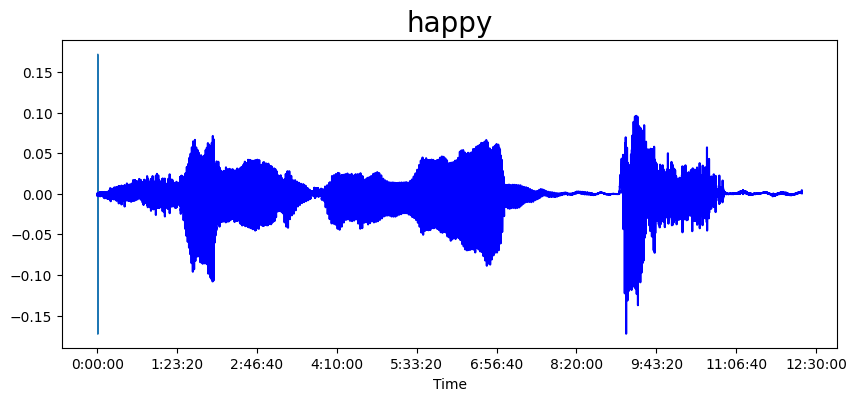

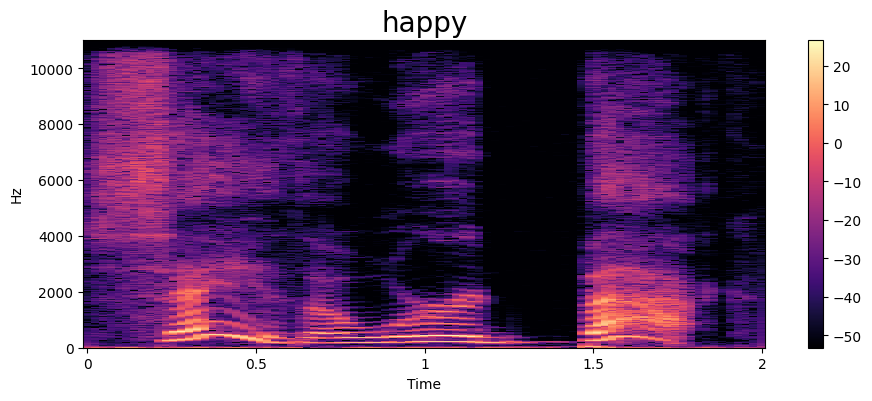

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# Feature Extraction

In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])


array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27551103e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126143e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722402e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996375e+00, -1.82390714e+00,
        4.86896276e+00,  9.31392384e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.65600896, -32.74544, ...
2       [-429.79196, 46.124, 1.5550478, -0.21709539, 2...
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.048096, ...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

In [28]:
y.shape

(2800, 7)

In [29]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=42)

# Print the shapes of the training and validation sets
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)


Training data shape: (560, 40, 1)
Validation data shape: (2240, 40, 1)
Training labels shape: (560, 7)
Validation labels shape: (2240, 7)


# Creating the LSTM Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [31]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [32]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 115ms/step - loss: 1.1985 - accuracy: 0.5527 - val_loss: 2.2447 - val_accuracy: 0.2839
Epoch 2/50
35/35 [==============================] - 3s 75ms/step - loss: 0.5324 - accuracy: 0.8036 - val_loss: 2.0693 - val_accuracy: 0.4554
Epoch 3/50
35/35 [==============================] - 3s 97ms/step - loss: 0.2712 - accuracy: 0.9080 - val_loss: 2.0438 - val_accuracy: 0.5250
Epoch 4/50
35/35 [==============================] - 7s 183ms/step - loss: 0.1786 - accuracy: 0.9438 - val_loss: 2.9621 - val_accuracy: 0.4125
Epoch 5/50
35/35 [==============================] - 6s 187ms/step - loss: 0.1681 - accuracy: 0.9509 - val_loss: 1.9443 - val_accuracy: 0.6339
Epoch 6/50
35/35 [==============================] - 4s 122ms/step - loss: 0.2437 - accuracy: 0.9268 - val_loss: 2.2267 - val_accuracy: 0.4464
Epoch 7/50
35/35 [==============================] - 4s 119ms/step - loss: 0.0990 - accuracy: 0.9710 - val_loss: 1.7761 - val_accuracy: 0.6089
Epoch 8/

In [33]:
# Predictions
y_pred_probabilities = model.predict(X_val)

70/70 [==============================] - 9s 44ms/step


In [34]:
y_pred = np.argmax(y_pred_probabilities, axis=1)

In [35]:
model.save('model.h5')
# Load the model
model = tf.keras.models.load_model('model.h5')

In [36]:
# Access accuracy values from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print accuracy
print("Training Accuracy:", accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])

Training Accuracy: 0.9982143044471741
Validation Accuracy: 0.4625000059604645


In [37]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X, y)

# Print the accuracy
print("Accuracy:", accuracy)


88/88 [==============================] - 4s 29ms/step - loss: 0.8123 - accuracy: 0.8918
Accuracy: 0.891785740852356


In [14]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

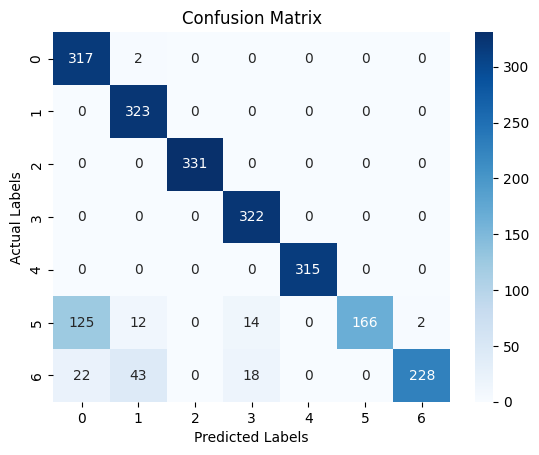

In [38]:
from sklearn.metrics import confusion_matrix

# Assuming you have the actual labels for validation data in 'y_val'

# Convert the actucal labels to categorical format if needed
y_val_categorical = np.argmax(y_val, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_val_categorical, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Plotting the results

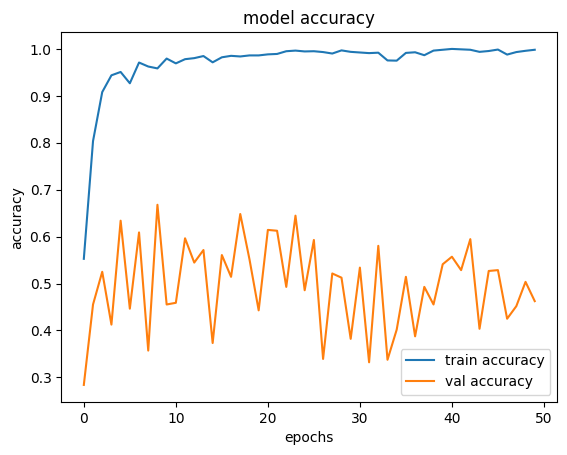

In [39]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.title('model accuracy')
plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

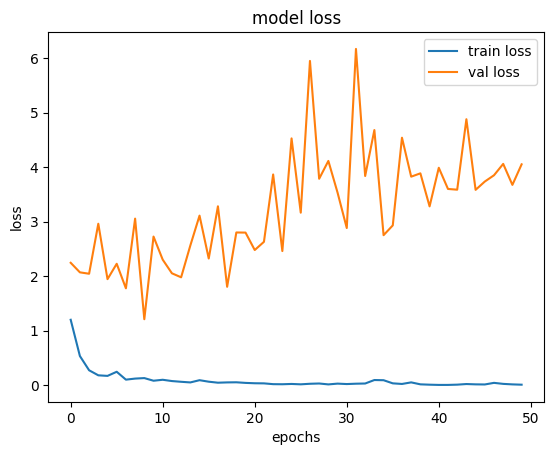

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.title('model loss')
plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()